In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [176]:
def one_simulation(cd):
    bidens_gains = []
    for county, [num_votes, spread] in cd.items():
        gain = np.random.normal(spread/100 * num_votes, std, 1)[0]
        bidens_gains.append(gain)
    return bidens_gains

def simulations(cd, n_samples):
    av_total_bidens_gains = []
    for i in range(n_samples):
        bidens_gains = one_simulation(cd)
        total_bidens_gains = sum(bidens_gains)
        av_total_bidens_gains.append(total_bidens_gains)
    return av_total_bidens_gains

In [157]:
guess1 = 6
guess2 = 20
std = 15


counties_dict = {'chat':[17157,22 + guess1], 'fult':[11200,51 + 0], 'clayton':[7400,70 + 0], 'gwin':[7338,23 + guess1], 'forsyth':[4713,-29 + guess2],
'harris':[3641, -49 + guess2], 'bryan':[3027,14 + 0], 'laurens':[1797,-24 + guess2], 'putnam':[1552,-4 + 0], 'sumter':[1200,30 + 0]}

counties_dict

{'chat': [17157, 28],
 'fult': [11200, 51],
 'clayton': [7400, 70],
 'gwin': [7338, 29],
 'forsyth': [4713, -9],
 'harris': [3641, -29],
 'bryan': [3027, 14],
 'laurens': [1797, -4],
 'putnam': [1552, -4],
 'sumter': [1200, 30]}

In [177]:
one_sim = one_simulation(counties_dict)
print(one_sim)
print(sum(one_sim))

[5144.845964009839, 5709.378876849999, 5180.018872155148, 2247.8884452934467, 33.27425099429746, -672.9982301854775, 428.67271110224186, 96.05119738047196, -43.67007587013938, 367.5045030004641]
18490.96651473029


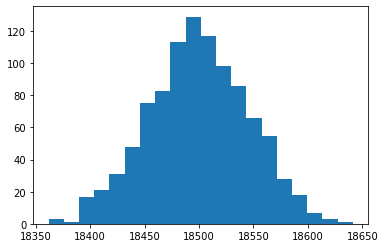

In [178]:
sim = simulations(counties_dict, 1000)
plt.hist(sim, bins = 20)
plt.show()

In [206]:
guess1 = [4,5,6,7,8]
guess2 = [20,22,24,26,28]
thresh = 17500

list_of_sims = []

for g1 in guess1:
    for g2 in guess2:
        counties_dict = {'chat':[17157,22 + g1], 'fult':[11200,51 + 0], 'clayton':[7400,70 + 0], 
                 'gwin':[7338,23 + g1], 'forsyth':[4713,-29 + g2], 'harris':[3641, -49 + g2], 
                 'bryan':[3027,14 + 0], 'laurens':[1797,-24 + g2],'putnam':[1552,-4 + 0], 
                 'sumter':[1200,30 + 0]}
        
        list_of_sims.append([g1,g2, simulations(counties_dict, 1000)])

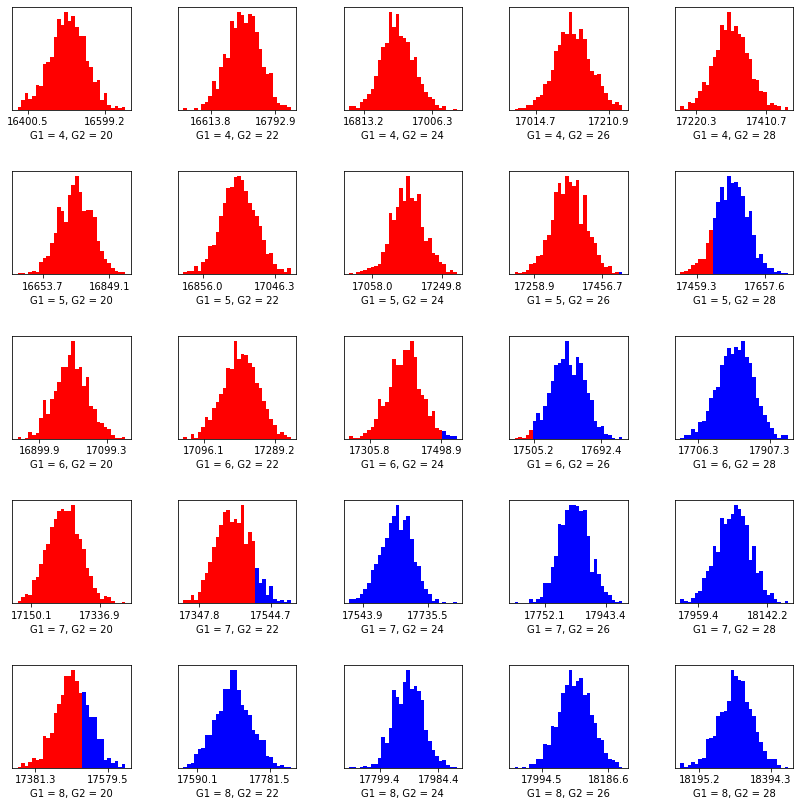

In [207]:
fig, axs = plt.subplots(len(guess1),len(guess2),figsize=(14,14))
plt.subplots_adjust(wspace = .4, hspace = .6)
f_color = lambda x: 'b' if x > thresh else 'r'

for k in range(len(list_of_sims)):
    i, j = k//len(guess1), k%len(guess2)
    _, _, bars = axs[i,j].hist( list_of_sims[k][2], bins = 30, color = 'r' )
    for bar in bars:
        if bar.get_x() > thresh:
            bar.set_facecolor('b')
    axs[i,j].set_xlabel( 'G1 = %i, G2 = %i' %tuple(list_of_sims[k][0:2]) )
    axs[i,j].set_xticks(np.percentile(list_of_sims[k][2],[2,98]) )
    axs[i,j].set_yticks([])

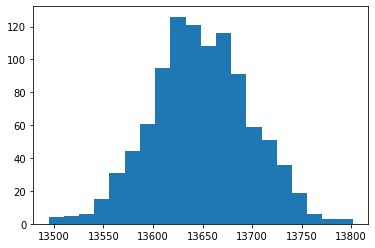

In [210]:
guess1 = 6
guess2 = 20
std = 15


counties_dict = {'chat':[17157,22 + 6], 'fult':[4000,51 + 0], 'clayton':[6800,70 + 0], 
                 'gwin':[7338,23 + guess1], 'forsyth':[4713,-29 + 20],
                 'harris':[3641, -49 + 40], 'bryan':[3027,14 + 0], 
                 'laurens':[1797,-24 + 15], 'putnam':[1552,-4 + 0], 
                 'sumter':[1200,30 + 0], 'cobb':[600, 18]}

sim = simulations(counties_dict, 1000)
plt.hist(sim, bins = 20)
plt.show()